In [1]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

import os
import model as OCRModel

import matplotlib.pyplot as plt

In [2]:
cwd=os.getcwd()
traindir=os.path.join(cwd, 'Preprocessed-Data','training-data')
testdir=os.path.join(cwd, 'Preprocessed-Data','testing-data')

In [3]:
transform=transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize(mean=[0.5894, 0.5894, 0.5894], std=[0.2729, 0.2729, 0.2729]),
                              transforms.Grayscale(num_output_channels=1),
                              transforms.RandomRotation(10),
                              transforms.RandomHorizontalFlip(),
                              transforms.RandomAffine(0, translate=(0.1, 0.1))])

In [7]:
trainData=datasets.ImageFolder(traindir, transform=transform)
testData=datasets.ImageFolder(testdir, transform=transform)

In [8]:
# parameters for dataloaders
batch_size=4
num_workers=2

trainloader=DataLoader(trainData,
                       batch_size=batch_size,
                       num_workers=num_workers,
                       shuffle=True)

testloader=DataLoader(testData,
                      batch_size=batch_size,
                      num_workers=num_workers,
                      shuffle=True)

In [12]:
for images, labels in trainloader:
    if(images.shape[0]!=4):
        print(images.shape, labels.shape)
    

*Printing Data for Visualization*

torch.Size([4, 1, 128, 128]) torch.Size([4])


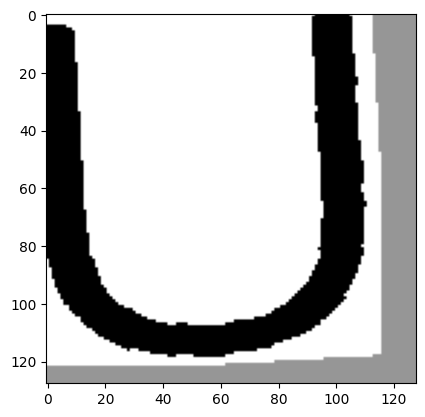

In [13]:
data_iter = iter(trainloader)
images, labels = next(data_iter)

# Print the shape of images and labels
print(images.shape, labels.shape)

# Function to unnormalize and show an image
def imshow(img):
    img = img * 0.5 + 0.5  # Unnormalize
    npimg = img.numpy()
    plt.imshow(npimg, cmap='gray')
    plt.show()

# Print one image from the batch
imshow(images[0][0])


In [14]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

cuda


In [32]:
model=OCRModel.myOCRModel(36).to(device)

**Training Model**

In [34]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for images, labels in trainloader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward pass and optimization
        loss.backward()
        optimizer.step()
        
        # Accumulate loss
        running_loss += loss.item()
    
    print(f'Epoch {epoch+1}, Loss: {running_loss/len(trainloader)}')

Epoch 1, Loss: 1.3748210340933213
Epoch 2, Loss: 0.6693931204806355
Epoch 3, Loss: 0.5928091278783453
Epoch 4, Loss: 0.5660182938789032
Epoch 5, Loss: 0.5552555155743826


**Model Evalutaion**

In [35]:
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in testloader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy: {100 * correct / total}%')

Accuracy: 84.72222222222223%


In [ ]:
#SAVE YOUR MODEL
#torch.save(model.state_dict(), 'ocr_model.pth')